In [44]:
from cuqi.distribution import DistributionGallery
from cuqi.experimental.mcmc import MHNew

In [45]:
target = DistributionGallery("BivariateGaussian")

### Initialization
The new sampler is initialized same as the old one

In [46]:
sampler = MHNew(target, scale=0.1)
print(sampler)

 Sampler: 
	 MHNew 
 Target: 
 	 CUQI DistributionGallery. 
 Current state: 
	 current_point: [1. 1.] 
	 current_target_logd: [-3.99857481] 
	 scale: 0.1 
	 _scale_temp: 0.1 



### Tuning
However, the user API is now different and more object-oriented.
For example, we can "warm up" (tune) the sampler as follows

In [47]:
sampler.warmup(1000)

  0% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--
  7% (76 of 1000) |#                     | Elapsed Time: 0:00:00 ETA:  00:00:00
 25% (254 of 1000) |#####                | Elapsed Time: 0:00:00 ETA:   0:00:00
 39% (393 of 1000) |########             | Elapsed Time: 0:00:00 ETA:   0:00:00
 53% (532 of 1000) |###########          | Elapsed Time: 0:00:00 ETA:   0:00:00
 65% (659 of 1000) |#############        | Elapsed Time: 0:00:00 ETA:   0:00:00
 76% (760 of 1000) |###############      | Elapsed Time: 0:00:00 ETA:   0:00:00
 93% (937 of 1000) |###################  | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


 Sampler: 
	 MHNew 
 Target: 
 	 CUQI DistributionGallery. 
 Current state: 
	 current_point: [0.34454574 0.5486393 ] 
	 current_target_logd: [-0.5652573] 
	 scale: 0.5840663911231305 
	 _scale_temp: 0.5840663911231305 

### Sampling
The sampling is also done in a more object-oriented way also. (Note the samples are NOT returned)

In [48]:
sampler.sample(1000)

  0% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--
 10% (102 of 1000) |##                   | Elapsed Time: 0:00:00 ETA:  00:00:00
 24% (241 of 1000) |#####                | Elapsed Time: 0:00:00 ETA:   0:00:00
 41% (418 of 1000) |########             | Elapsed Time: 0:00:00 ETA:   0:00:00
 50% (507 of 1000) |##########           | Elapsed Time: 0:00:00 ETA:   0:00:00
 59% (595 of 1000) |############         | Elapsed Time: 0:00:00 ETA:   0:00:00
 73% (735 of 1000) |###############      | Elapsed Time: 0:00:00 ETA:   0:00:00
 88% (887 of 1000) |##################   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


 Sampler: 
	 MHNew 
 Target: 
 	 CUQI DistributionGallery. 
 Current state: 
	 current_point: [0.58291236 0.01706046] 
	 current_target_logd: [-3.79762012] 
	 scale: 0.5840663911231305 
	 _scale_temp: 0.5840663911231305 

In [49]:
sampler.warmup(200)

  0% (0 of 200) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
 48% (97 of 200) |###########            | Elapsed Time: 0:00:00 ETA:  00:00:00
100% (200 of 200) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


 Sampler: 
	 MHNew 
 Target: 
 	 CUQI DistributionGallery. 
 Current state: 
	 current_point: [-0.27510572  0.01297955] 
	 current_target_logd: [-1.14530061] 
	 scale: 0.7970554668469051 
	 _scale_temp: 0.7970554668469051 

### Getting the samples
The samples are obtained by calling the `get_samples` method

In [50]:
samples = sampler.get_samples()

array([[<AxesSubplot:title={'center':'v0'}>,
        <AxesSubplot:title={'center':'v0'}>],
       [<AxesSubplot:title={'center':'v1'}>,
        <AxesSubplot:title={'center':'v1'}>]], dtype=object)

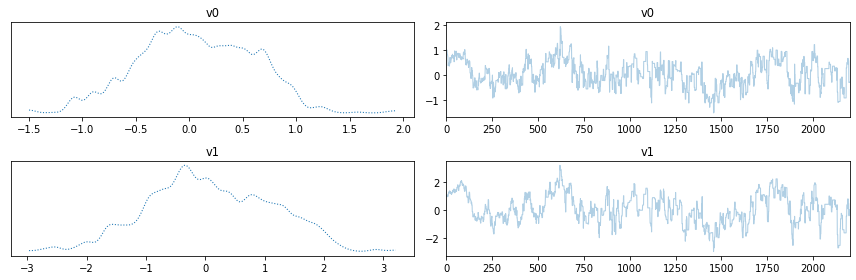

In [51]:
samples.plot_trace()

In [ ]:
samples.burnthin(1000).plot_pair()

### Checkpointing
The sampler can be checkpointed and restored as follows

In [52]:
sampler.save_checkpoint('my_checkpoint.pickle')
sampler

 Sampler: 
	 MHNew 
 Target: 
 	 CUQI DistributionGallery. 
 Current state: 
	 current_point: [-0.27510572  0.01297955] 
	 current_target_logd: [-1.14530061] 
	 scale: 0.7970554668469051 
	 _scale_temp: 0.7970554668469051 

In [53]:
sampler.warmup(200)

  0% (0 of 200) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
 35% (71 of 200) |########               | Elapsed Time: 0:00:00 ETA:  00:00:00
 85% (170 of 200) |##################    | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (200 of 200) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


 Sampler: 
	 MHNew 
 Target: 
 	 CUQI DistributionGallery. 
 Current state: 
	 current_point: [0.29125042 0.8588542 ] 
	 current_target_logd: [-0.77864805] 
	 scale: 0.9620206839511813 
	 _scale_temp: 0.9620206839511813 

In [54]:
sampler.load_checkpoint('my_checkpoint.pickle')
sampler

 Sampler: 
	 MHNew 
 Target: 
 	 CUQI DistributionGallery. 
 Current state: 
	 current_point: [-0.27510572  0.01297955] 
	 current_target_logd: [-1.14530061] 
	 scale: 0.7970554668469051 
	 _scale_temp: 0.7970554668469051 

### Batching
The sampler run can be "batched" as follows (names to be decided)

In [ ]:
sampler.sample(500, batch_size=100)

In [ ]:
!dir CUQI_samples

### Gibbs use-case
One feature we get from the new sampler design is more flexibility in our Gibbs sampling.
Now we can for example run NUTS-within-Gibbs as follows

In [ ]:
import numpy as np
from cuqi.distribution import Gamma, Gaussian, GMRF, JointDistribution
from cuqi.experimental.mcmc import MHNew, NUTSNew, GibbsNew, ConjugateNew
from cuqi.sampler import Gibbs, Conjugate, LinearRTO, NUTS
from cuqi.testproblem import Deconvolution1D

In [ ]:
# Forward problem
A, y_data, info = Deconvolution1D(dim=128, phantom='sinc', noise_std=0.001).get_components()

In [ ]:
# Target
s = Gamma(1, 1e-4)
x = GMRF(np.zeros(A.domain_dim), 50)
y = Gaussian(A@x, lambda s: 1/s)

# %%
target = JointDistribution(y, x, s)(y=y_data)


In [ ]:
# Old-style Gibbs. Only supports "Static" (non-adaptive) samplers
sampling_strategy = {
    "x" : LinearRTO,
    "s" : Conjugate
}

sampler = Gibbs(target, sampling_strategy)

# %%

samples = sampler.sample(200, 50)

In [ ]:
# New-style Gibbs. Supports object-oriented that maintain state through iterations

sampling_strategy_new = {
    "x" : NUTSNew(),     # <--- Notice class instance
    "s" : ConjugateNew() # <--- Notice class instance
}

sampler_new = GibbsNew(target, sampling_strategy_new)

# Sampling will be a slower for NUTS here because of the target distribution
samples_new = sampler_new.sample(200, 50)


In [ ]:
samples_new["x"].plot_ci()